In [1]:
########## 2 October 2018 - Alec S. Hirschauer ##########
# Today I am going to make CMDs and CCDs for NGC 6822 using Python
# drawing from the Khan et al. (2015) Spitzer data set
# matched with the Sibbons et al. (2012) WFCAM/UKIRT data set.
#
# I have run a CasJobs query to create a new table of values
# locally saved as a .csv file, with all relevant color terms
# already built in to the spreadsheet.
#
# These plots are based on the suggestion of Margaret Meixner:
# K vs J-K, [3.6] vs J-[3.6], [8.0] vs [3.6]-[8.0], [8.0] vs J-[8.0]
# [24] vs [8.0] - [24], [8.0] vs [4.5] - [8.0]
#
# NB: the [3.6] vs [3.6] - [8.0] CMD has been changed to now be
# [8.0] vs [3.6] - [8.0], swapping the y-axis from [3.6] to [8.0].

In [2]:
# In addition to the CMDs (but not CCDs) discussed above,
# I am going to make histograms of the colors.
#
# Libby Jones suggested that these will be useful to determine
# where the color cuts will be in the CMDs themselves
# for identification of the O- and C-rich AGB stars.
#
# Essentially, where in the histograms there is an inflection
# point (toward the red side of the distribution) gives an
# indication of the change in the stellar population at that color.
#
# The resultant vertical line will be a good place to start,
# however Libby further cautioned that an inclined boundary line
# is a more truthful segregator.

In [3]:
# First thing needed is to import the relevant Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gaussian_kde
# This line is necessary for the number density histograms.
from astropy import stats
from astropy.stats.histogram import knuth_bin_width
# This line is necessary for determining histogram bin width.

In [4]:
# Read in my data from a .csv file saved locally.
phot_data = pd.read_csv('CMDKhanANDSibbonsHOME_ahirschauer.csv')
# This is a table of values with 30,745 rows which contains the photometric data of
# the Khan et al. (2015) catalog matched to sources from Sibbons et al. (2012)
# with an "OR" command, then downloaded from MAST CasJobs.
# print phot_data
#
# Also I'll read in the entire Sibbons+ stellar source catalog.
Sibbons_data = pd.read_csv('Sibbons2012NGC6822.csv')
# This is for a test of the histogram(s) I make later on.

In [5]:
# For the histograms, I have created new .csv files which have the specific colors'
# information: ID, RA, Dec, magnitudes, magnitude errors, color, color error.
#
# I have pre-trimmed the bogus data from these tables already, so there's no need
# to get rid of the whacky 'null' values converted to "-9999" values
# (which, when subtracted from any other value, gives another bogus value)
# like I did in the previous cell with the "full" catalog.
#
jMINUSkDATA = pd.read_csv('jMINUSk.csv')
jMINUSthreesixDATA = pd.read_csv('jMINUSthreesix.csv')
threesixMINUSeightzeroDATA = pd.read_csv('threesixMINUSeightzero.csv')
jMINUSeightzeroDATA = pd.read_csv('jMINUSeightzero.csv')
#
# After comparing cells where I made CMDs with the "filter_phot_data" data and with
# the specific colors' information above, I have found that they are the same!
# I will use these data instead of calling from the larger catalog.
#
# These two were made following a meeting with Margaret on 2 October 2018.
eightzeroMINUStwentyfourDATA = pd.read_csv('eightzeroMINUStwentyfour.csv')
fourfiveMINUSeightzeroDATA = pd.read_csv('fourfiveMINUSeightzero.csv')

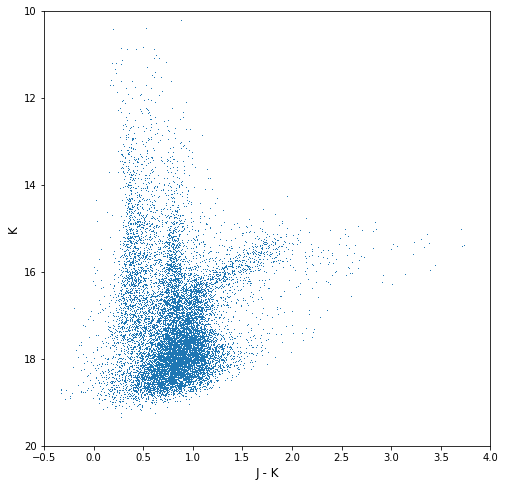

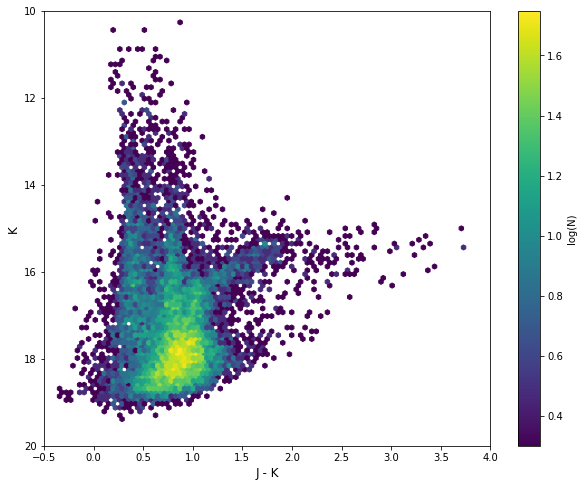

In [6]:
# K vs J-K
# CMD & Hess diagram
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#plt.savefig('K_vs_J-K_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
im1 = ax1.hexbin(phot_data.jMINUSk, phot_data.Kmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5, 4.0, 20.0, 10.0))
ax1.set_xlabel('J - K', size=12)
ax1.set_ylabel('K', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('K_vs_J-K_hist.pdf')

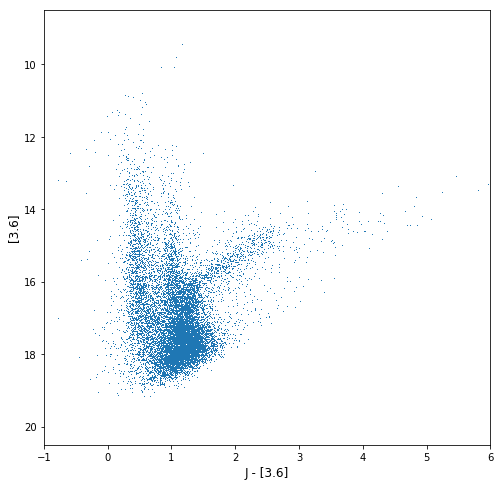

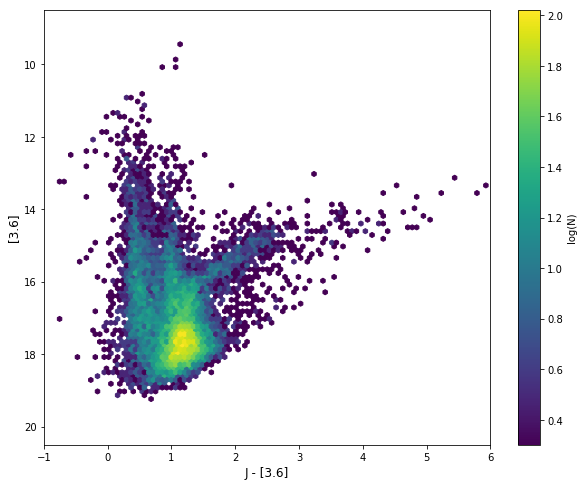

In [7]:
# [3.6] vs J-[3.6]
# CMD & Hess diagram
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-1.0, 6.0)
plt.ylim(20.5, 8.5)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#plt.savefig('[3.6]_vs_J-[3.6]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.0, 6.0)
plt.ylim(20.5, 8.5)
im1 = ax1.hexbin(phot_data.jMINUSthreesix, phot_data.k36mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.0, 6.0, 20.5, 8.5))
ax1.set_xlabel('J - [3.6]', size=12)
ax1.set_ylabel('[3.6]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[3.6]_vs_J-[3.6]_hist.pdf')

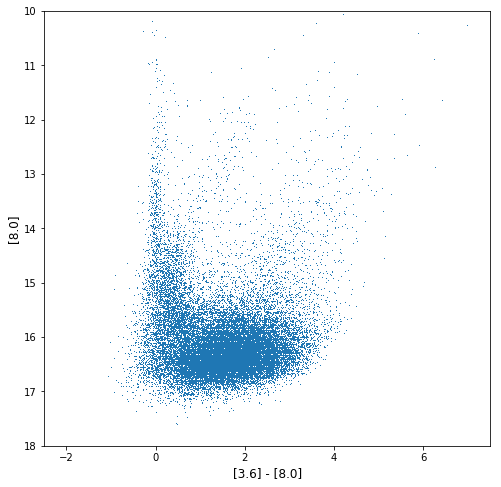

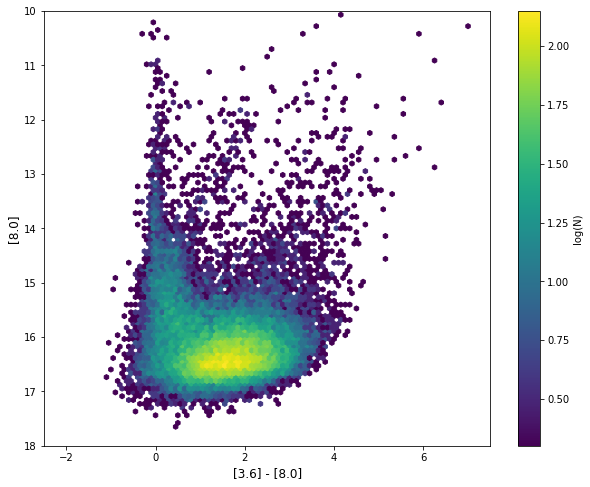

In [8]:
# [8.0] vs. [3.6]-[8.0]
# CMD & Hess diagram
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.threesixMINUSeightzero, phot_data.k80mag, ',')
plt.xlim(-2.5, 7.5)
plt.ylim(18.0, 10.0)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#plt.savefig('[8.0]_vs_[3.6]-[8.0]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-2.5, 7.5)
plt.ylim(18.0, 10.0)
im1 = ax1.hexbin(phot_data.threesixMINUSeightzero, phot_data.k80mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-2.5, 7.5, 18.0, 10.0))
ax1.set_xlabel('[3.6] - [8.0]', size=12)
ax1.set_ylabel('[8.0]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[8.0]_vs_[3.6]-[8.0]_hist.pdf')

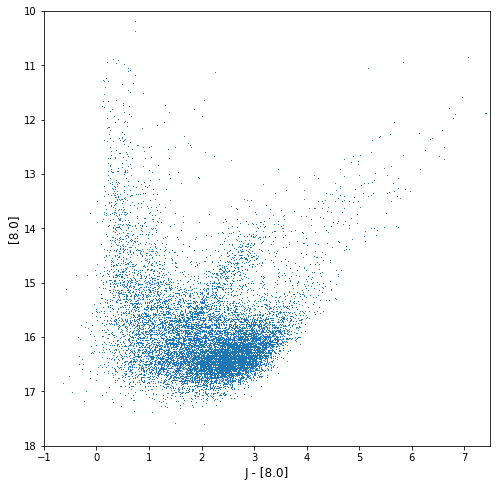

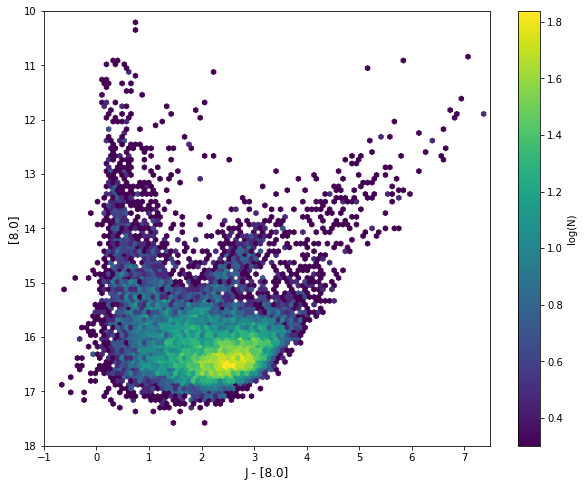

In [9]:
# [8.0] vs J-[8.0]
# CMD & Hess diagram
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSeightzero, phot_data.k80mag, ',')
plt.xlim(-1.0, 7.5)
plt.ylim(18.0, 10.0)
plt.xlabel('J - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#plt.savefig('[8.0]_vs_J-[8.0]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.0, 7.5)
plt.ylim(18.0, 10.0)
im1 = ax1.hexbin(phot_data.jMINUSeightzero, phot_data.k80mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.0, 7.5, 18.0, 10.0))
ax1.set_xlabel('J - [8.0]', size=12)
ax1.set_ylabel('[8.0]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[8.0]_vs_J-[8.0]_hist.pdf')

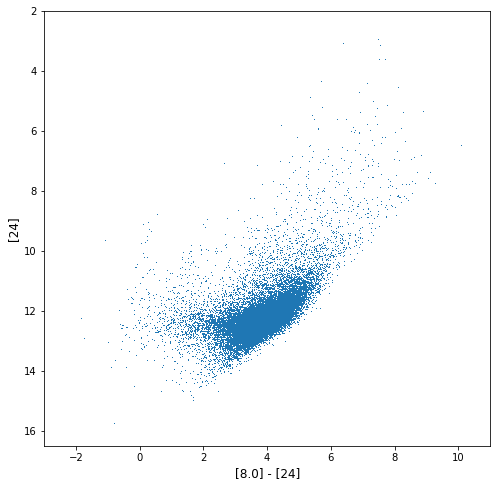

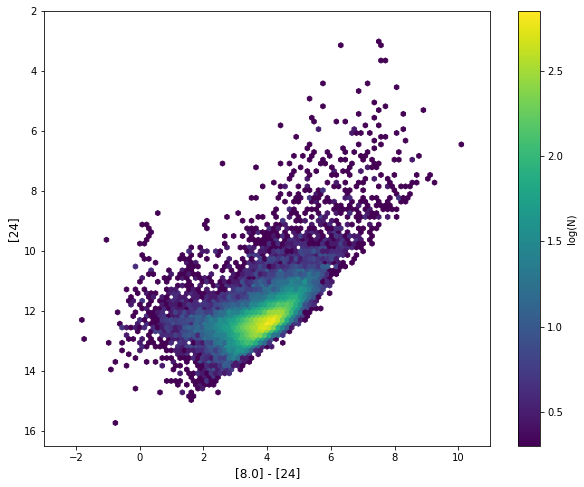

In [10]:
# [24] vs [8.0]-[24]
# CMD & Hess diagram
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.eightzeroMINUStwentyfour,phot_data.k24mag,',')
plt.xlim(-3.0, 11.0)
plt.ylim(16.5, 2.0)
plt.xlabel('[8.0] - [24]', size=12)
plt.ylabel('[24]', size=12)
#plt.savefig('[24]_vs_[8.0]-[24]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-3.0, 11.0)
plt.ylim(16.5, 2.0)
im1 = ax1.hexbin(phot_data.eightzeroMINUStwentyfour, phot_data.k24mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3.0, 11.0, 16.5, 2.0))
ax1.set_xlabel('[8.0] - [24]', size=12)
ax1.set_ylabel('[24]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[24]_vs_[8.0]-[24]_hist.pdf')

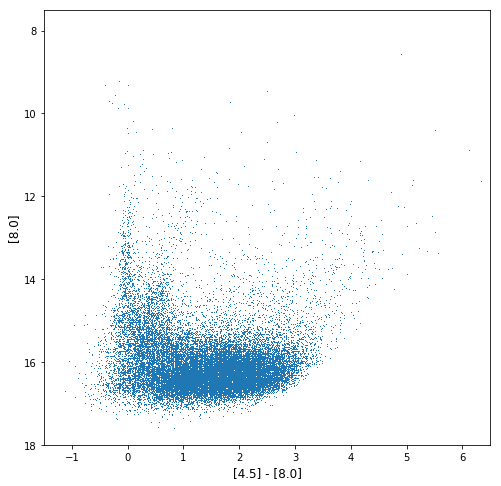

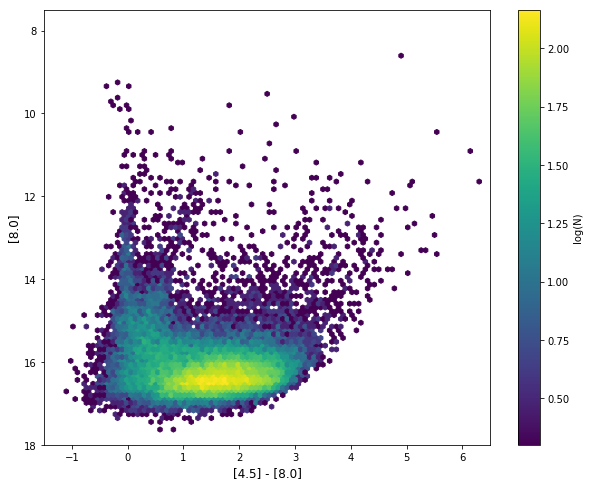

In [11]:
# [8.0] vs [4.5]-[8.0]
# CMD & Hess diagram
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.fourfiveMINUSeightzero,phot_data.k80mag,',')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 7.5)
plt.xlabel('[4.5] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#plt.savefig('[8.0]_vs_[4.5]-[8.0]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 7.5)
im1 = ax1.hexbin(phot_data.fourfiveMINUSeightzero, phot_data.k80mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.5, 6.5, 18.0, 7.5))
ax1.set_xlabel('[4.5] - [8.0]', size=12)
ax1.set_ylabel('[8.0]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[8.0]_vs_[4.5]-[8.0]_hist.pdf')

In [12]:
# These look great!  There's a lot more in this dataset (Sibbons+ 2012) than in the
# previous near-IR catalog (Whitelock+ 2013), however this is due to the wider spatial
# coverage, the deeper photometry (which isn't as much as I had originally expected),
# and that the current dataset has not been cleaned of contaminants.
#
# Now to make the histograms.

/Users/ahirschauer/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


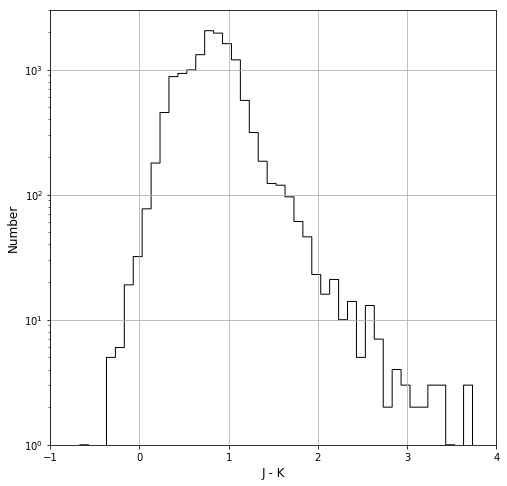

In [13]:
# J-K
# histogram
#
binwidth = 0.1
bin_number = (max(phot_data.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(phot_data.jMINUSk, bins=np.arange(min(phot_data.jMINUSk), max(phot_data.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-1.0, 4.0)
plt.ylim(0.0, 3000.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

In [14]:
# The histogram above is not what I would have expected, based on what Libby showed me
# at the IAU last month.  I assumed that the histogram's various peaks would be more
# pronounced, such that the different populations would be more obviously distinct.
#
# In our telecon, Libby suggested that the more useful histogram would be one where
# it is binned by magnitude.  Based on the K vs J-K CMD, a reasonable magnitude range
# to use would something like K = 14 to 16.
#
# Libby had sent me some sort of Bayesian code for determining binwidth in Python:
#
# bw = stats.knuth_bin_width(star_cat["Jmag"])   # Determinal optimal bin size
#
# As of now I've set the binwidth to 0.1, so I guess I can run this and see what it says?
# Looks like my notes on the matter are missing something... I assumed that Libby's
# string of code was supposed to help me with the y-axis, but maybe it's for x-axis instead.
#
# EDIT: I e-mailed Libby about it today (27 Sep 2018) so let's see what she says.
# EDIT: Still no response as of 3 Oct 2018.

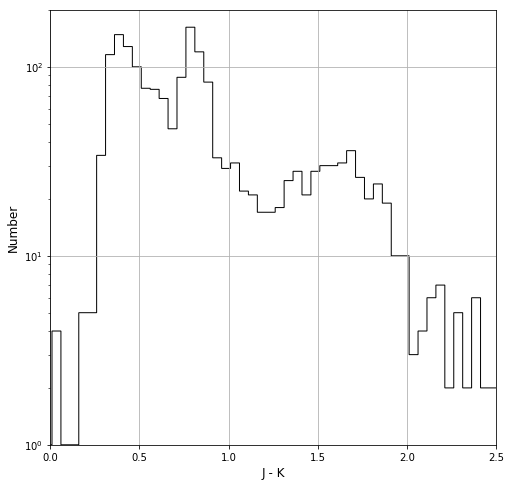

In [15]:
# J-K
# histogram (where phot_data.Kmag < 17.0)
#
# I want to make a histogram of J-K where I only keep data with
# K-band magnitudes less than 17.0.
# EDIT: make that K-band magnitudes between 14.0 and 16.0.
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST = phot_data[(phot_data.Kmag < 16.0) & (phot_data.Kmag > 14.0)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

In [16]:
# By eye, it appears as if the vertical lines which separate the AGB populations
# are at about J-K = 0.7 (separating foreground stars from M-type/O-rich AGBs)
# and at about J-K = 1.2 (separating M-type/O-rich AGBs from C-type/C-rich AGBs).
#
# For comparison, the Sibbons+ boundaries are at J-K = 0.72 and 1.20, respectively.
# A more rigorous determination of these lines is of course crucial for our work!
#
# How about some routine that estimates where the inflection points are by
# fitting something like a gaussian to the various distributions?